In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['font.size'] = 15

In [2]:
predictions_results=pd.read_csv("predictions_results.csv")

In [3]:
predictions_results

,RF_s1,RF_s2,XGB_s1,XGB_s2,GB_s1,GB_s2,Original
0,0.942355,0.944640,0.939939,0.940932,0.940002,0.941001,0.940725
1,0.869197,0.871249,0.887640,0.886199,0.885790,0.884392,0.886500
2,0.800409,0.800772,0.803968,0.800896,0.803496,0.800582,0.800570
3,0.800404,0.800771,0.797632,0.797900,0.799319,0.800582,0.800570
4,0.800060,0.801640,0.801312,0.801712,0.799938,0.801680,0.800382
...,...,...,...,...,...,...,...
1192,0.759942,0.561397,0.713652,0.678052,0.826859,0.641462,0.628333
1193,0.613054,0.610283,0.625988,0.626712,0.625632,0.625677,0.625625
1194,0.603144,0.604088,0.624521,0.624535,0.625252,0.625775,0.625625
1195,0.556301,0.567586,0.505006,0.506300,0.505833,0.506653,0.505889


In [4]:
frf=pd.read_csv("features_importances_RF_s1.csv")
fgb=pd.read_csv("features_importances_GB_s1.csv")
fxgb=pd.read_csv("features_importances_XGB_s1.csv")
frf2=pd.read_csv("features_importances_RF_s2.csv")
fgb2=pd.read_csv("features_importances_GB_s2.csv")
fxgb2=pd.read_csv("features_importances_XGB_s2.csv")

In [5]:
f1=pd.merge(pd.merge(frf,fgb,on='Features'),fxgb,on='Features')
f1.rename(columns = {'Importances_x':'Random Forest', 'Importances_y':'Gradient Boosting', 'Importances':'Extreme Gradient Boosting'}, inplace = True)
f1=f1.set_index("Features")
f2=pd.merge(pd.merge(frf2,fgb2,on='Features'),fxgb2,on='Features')
f2.rename(columns = {'Importances_x':'Random Forest', 'Importances_y':'Gradient Boosting', 'Importances':'Extreme Gradient Boosting'}, inplace = True)
f2=f2.set_index("Features")

In [6]:
f2

,Random Forest,Gradient Boosting,Extreme Gradient Boosting
Features,,,
wip_rf,0.22,0.04,0.03
targeted_productivity,0.21,0.17,0.13
smv,0.12,0.06,0.04
incentive,0.09,0.06,0.07
team,0.07,0.03,0.03
no_of_workers,0.07,0.03,0.03
over_time,0.06,0.02,0.02
Month,0.02,0.01,0.01
quarter_Quarter4,0.02,0.03,0.03


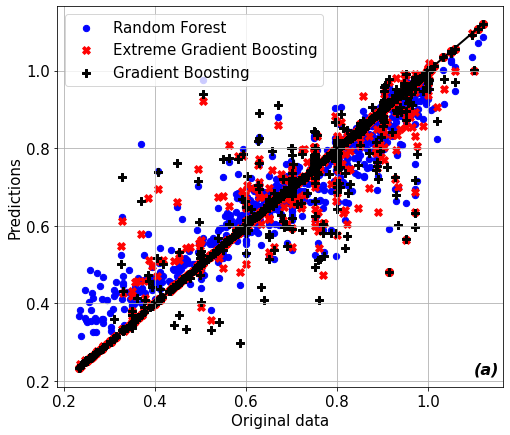

In [7]:
plt.figure(figsize=(8,7))
plt.scatter(predictions_results["Original"],predictions_results["RF_s1"],color='b',s=40,marker='o',alpha=0.99,label="Random Forest")
plt.scatter(predictions_results["Original"],predictions_results["XGB_s1"],color='r',s=60,marker='X',alpha=0.99,label="Extreme Gradient Boosting")
plt.scatter(predictions_results["Original"],predictions_results["GB_s1"],color='k',s=60,marker='P',alpha=0.99,label="Gradient Boosting")
plt.plot(np.linspace(0.23,1.12,5),np.linspace(0.23,1.12,5),c='k')
plt.xlabel("Original data",fontsize=15)
plt.ylabel("Predictions",fontsize=15)
plt.grid()
plt.legend(loc=2)
plt.text(1.1,0.22,"(a)",fontsize=16,fontweight="bold",fontstyle="italic")
plt.savefig("prediction_fig1_s1.pdf",bbox_inches='tight')
plt.show()

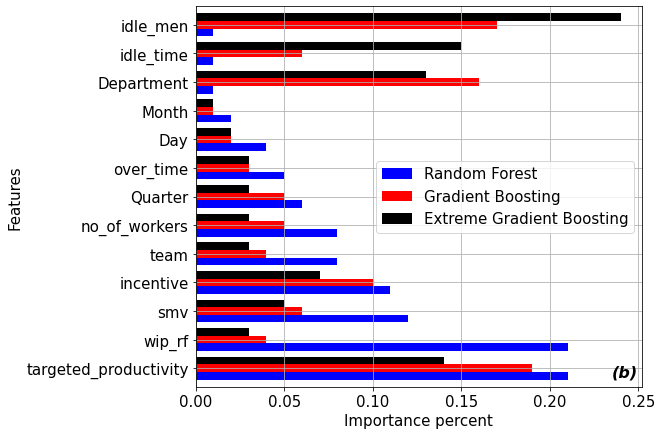

In [19]:
ax = f1[:-1].plot.barh(color={"Random Forest": "b", "Gradient Boosting": "r", "Extreme Gradient Boosting": "k"},figsize=(8,7),width=0.8)
plt.xlabel("Importance percent",fontsize=15)
plt.ylabel("Features",fontsize=15)
plt.text(0.235,-0.3,"(b)",fontsize=16,fontweight="bold",fontstyle="italic")
plt.grid()
plt.savefig("prediction_fig2_s1.pdf",bbox_inches='tight')
plt.show()

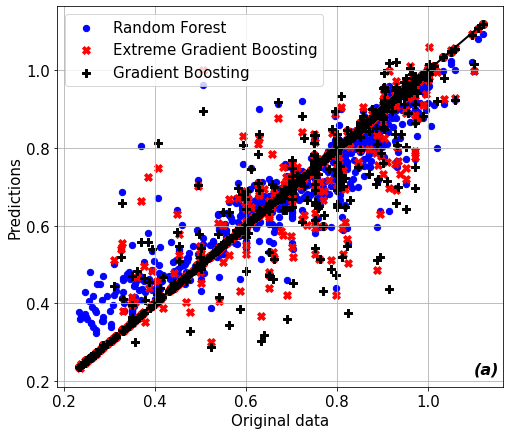

In [9]:
plt.figure(figsize=(8,7))
plt.scatter(predictions_results["Original"],predictions_results["RF_s2"],color='b',s=40,marker='o',alpha=0.99,label="Random Forest")
plt.scatter(predictions_results["Original"],predictions_results["XGB_s2"],color='r',s=60,marker='X',alpha=0.99,label="Extreme Gradient Boosting")
plt.scatter(predictions_results["Original"],predictions_results["GB_s2"],color='k',s=60,marker='P',alpha=0.99,label="Gradient Boosting")
plt.plot(np.linspace(0.23,1.12,5),np.linspace(0.23,1.12,5),c='k')
plt.xlabel("Original data",fontsize=15)
plt.ylabel("Predictions",fontsize=15)
plt.grid()
plt.legend(loc=2)
plt.text(1.1,0.22,"(a)",fontsize=16,fontweight="bold",fontstyle="italic")
plt.savefig("prediction_fig1_s2.pdf",bbox_inches='tight')
plt.show()

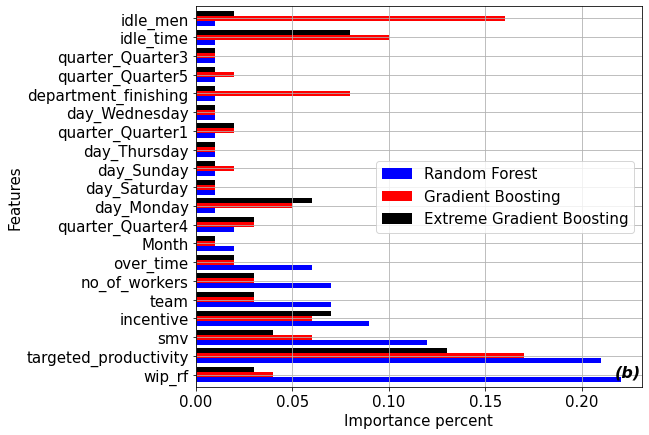

In [18]:
ax = f2[:-4].plot.barh(color={"Random Forest": "b", "Gradient Boosting": "r", "Extreme Gradient Boosting": "k"},figsize=(8,7),width=0.8)
plt.xlabel("Importance percent",fontsize=15)
plt.ylabel("Features",fontsize=15)
plt.text(0.217,-0.1,"(b)",fontsize=16,fontweight="bold",fontstyle="italic")
plt.grid()
plt.savefig("prediction_fig2_s2.pdf",bbox_inches='tight')
plt.show()

In [11]:
original=pd.read_csv("garments_worker_productivity.csv")

In [12]:
predictions_results["Inputed?"]=original["wip"].isna()
predictions_results

,RF_s1,RF_s2,XGB_s1,XGB_s2,GB_s1,GB_s2,Original,Inputed?
0,0.942355,0.944640,0.939939,0.940932,0.940002,0.941001,0.940725,False
1,0.869197,0.871249,0.887640,0.886199,0.885790,0.884392,0.886500,True
2,0.800409,0.800772,0.803968,0.800896,0.803496,0.800582,0.800570,False
3,0.800404,0.800771,0.797632,0.797900,0.799319,0.800582,0.800570,False
4,0.800060,0.801640,0.801312,0.801712,0.799938,0.801680,0.800382,False
...,...,...,...,...,...,...,...,...
1192,0.759942,0.561397,0.713652,0.678052,0.826859,0.641462,0.628333,True
1193,0.613054,0.610283,0.625988,0.626712,0.625632,0.625677,0.625625,True
1194,0.603144,0.604088,0.624521,0.624535,0.625252,0.625775,0.625625,True
1195,0.556301,0.567586,0.505006,0.506300,0.505833,0.506653,0.505889,True


In [13]:
predictions_results["RF_e"]=abs(predictions_results["RF_s1"]-predictions_results["Original"])/predictions_results["Original"]*100
predictions_results["RF2_e"]=abs(predictions_results["RF_s2"]-predictions_results["Original"])/predictions_results["Original"]*100
predictions_results["GB_e"]=abs(predictions_results["GB_s1"]-predictions_results["Original"])/predictions_results["Original"]*100
predictions_results["GB2_e"]=abs(predictions_results["GB_s2"]-predictions_results["Original"])/predictions_results["Original"]*100
predictions_results["XGB_e"]=abs(predictions_results["XGB_s1"]-predictions_results["Original"])/predictions_results["Original"]*100
predictions_results["XGB2_e"]=abs(predictions_results["XGB_s2"]-predictions_results["Original"])/predictions_results["Original"]*100
predictions_results

,RF_s1,RF_s2,XGB_s1,XGB_s2,GB_s1,GB_s2,Original,Inputed?,RF_e,RF2_e,GB_e,GB2_e,XGB_e,XGB2_e
0,0.942355,0.944640,0.939939,0.940932,0.940002,0.941001,0.940725,False,0.173231,0.416127,0.076854,0.029332,0.083589,0.021919
1,0.869197,0.871249,0.887640,0.886199,0.885790,0.884392,0.886500,True,1.951884,1.720389,0.080098,0.237753,0.128649,0.033907
2,0.800409,0.800772,0.803968,0.800896,0.803496,0.800582,0.800570,False,0.020120,0.025227,0.365451,0.001436,0.424365,0.040718
3,0.800404,0.800771,0.797632,0.797900,0.799319,0.800582,0.800570,False,0.020753,0.025052,0.156366,0.001436,0.367060,0.333549
4,0.800060,0.801640,0.801312,0.801712,0.799938,0.801680,0.800382,False,0.040260,0.157233,0.055449,0.162213,0.116220,0.166145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,0.759942,0.561397,0.713652,0.678052,0.826859,0.641462,0.628333,True,20.945612,10.653030,31.595530,2.089476,13.578532,7.912787
1193,0.613054,0.610283,0.625988,0.626712,0.625632,0.625677,0.625625,True,2.009317,2.452190,0.001069,0.008281,0.057975,0.173712
1194,0.603144,0.604088,0.624521,0.624535,0.625252,0.625775,0.625625,True,3.593431,3.442496,0.059638,0.023925,0.176442,0.174193
1195,0.556301,0.567586,0.505006,0.506300,0.505833,0.506653,0.505889,True,9.965105,12.195807,0.011006,0.151081,0.174578,0.081295


In [14]:
crit=5
for i in ["RF_e","RF2_e","GB_e","GB2_e","XGB_e","XGB2_e"]:
    print("Percent of instances imputed for",i,"is",
          round(len(predictions_results[(predictions_results[i]>crit)&(predictions_results["Inputed?"]==True)])/len(predictions_results)*100,2))
    print("Percent of instances imputed for",i,"is",
          round(len(predictions_results[(predictions_results[i]>crit)&(predictions_results["Inputed?"]==False)])/len(predictions_results)*100,2))
    print("========================")

Percent of instances imputed for RF_e is 21.55
Percent of instances imputed for RF_e is 11.11
Percent of instances imputed for RF2_e is 21.55
Percent of instances imputed for RF2_e is 11.28
Percent of instances imputed for GB_e is 7.27
Percent of instances imputed for GB_e is 4.43
Percent of instances imputed for GB2_e is 7.77
Percent of instances imputed for GB2_e is 4.18
Percent of instances imputed for XGB_e is 7.85
Percent of instances imputed for XGB_e is 5.18
Percent of instances imputed for XGB2_e is 8.19
Percent of instances imputed for XGB2_e is 4.26


In [15]:
predictions_results[(predictions_results["RF_e"]>crit)&(predictions_results["Inputed?"]==True)]

,RF_s1,RF_s2,XGB_s1,XGB_s2,GB_s1,GB_s2,Original,Inputed?,RF_e,RF2_e,GB_e,GB2_e,XGB_e,XGB2_e
6,0.794975,0.722797,0.831990,0.771208,0.737730,0.771925,0.755167,True,5.271429,4.286492,2.308971,2.219177,10.173046,2.124194
15,0.797647,0.758779,0.780498,0.830340,0.786114,0.807200,0.593056,True,34.497856,27.943920,32.553197,36.108647,31.606255,40.010506
16,0.593105,0.590187,0.539990,0.540374,0.542732,0.544337,0.540729,True,9.686141,9.146483,0.370472,0.667201,0.136774,0.065720
18,0.538126,0.558991,0.436095,0.440238,0.437983,0.438411,0.436326,True,23.331051,28.112938,0.379749,0.477873,0.052943,0.896398
20,0.927261,0.948935,0.987863,0.986003,0.987831,0.987226,0.987880,True,6.136315,3.942303,0.005035,0.066264,0.001716,0.190000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,0.814023,0.765737,0.874103,0.873609,0.873455,0.873825,0.874028,True,6.865297,12.389907,0.065582,0.023226,0.008560,0.047967
1181,0.588714,0.596001,0.707475,0.511515,0.581705,0.488901,0.786632,True,25.160220,24.233787,26.051135,37.848796,10.062797,34.973981
1192,0.759942,0.561397,0.713652,0.678052,0.826859,0.641462,0.628333,True,20.945612,10.653030,31.595530,2.089476,13.578532,7.912787
1195,0.556301,0.567586,0.505006,0.506300,0.505833,0.506653,0.505889,True,9.965105,12.195807,0.011006,0.151081,0.174578,0.081295


In [32]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, matthews_corrcoef, accuracy_score, r2_score
def metrics(dat_o,dat_r):
    mae=mean_absolute_error(dat_o,dat_r)
    mape=mean_absolute_percentage_error(dat_o,dat_r)
    rmse=np.sqrt(mean_squared_error(dat_o,dat_r))
    r2=np.corrcoef(dat_o,dat_r)[0][1]
    ac=r2_score(dat_o,dat_r)
    return mae, mape, rmse, r2, ac

In [33]:
for i in ["RF_s1","XGB_s1","GB_s1","RF_s2","XGB_s2","GB_s2"]:
    print(i,metrics(predictions_results[i],predictions_results["Original"]))

RF_s1 (0.03651272639436637, 0.05776693559738852, 0.0628775800751056, 0.9368049589521644, 0.8211856919022931)
XGB_s1 (0.01739073396897354, 0.026417807442717326, 0.04971310387349567, 0.9586779180990985, 0.912858092687668)
GB_s1 (0.018180971322041276, 0.029086743239808904, 0.055884581156867265, 0.9484159899712179, 0.8948167845627011)
RF_s2 (0.036924846242368456, 0.05899381216815681, 0.06346106164901633, 0.9355645783527412, 0.8176353201258502)
XGB_s2 (0.017644733300669183, 0.02841517641300649, 0.05338790259003425, 0.9528937617206817, 0.9035725851172075)
GB_s2 (0.018969662102324106, 0.032394000714214014, 0.05855974039497608, 0.9439736145808516, 0.8864034992514058)


In [47]:
fxgb2["Cum"]=fxgb2["Importances"].cumsum()
fxgb2

,Features,Importances,Cum
0,department_sweing,0.30,0.30
1,targeted_productivity,0.13,0.43
2,idle_time,0.08,0.51
3,incentive,0.07,0.58
4,day_Monday,0.06,0.64
5,smv,0.04,0.68
6,wip_rf,0.03,0.71
7,no_of_workers,0.03,0.74
8,quarter_Quarter4,0.03,0.77
9,team,0.03,0.80


In [37]:
data=pd.read_csv("garments_worker_productivity.csv")

In [41]:
data["incentive"].describe()


count    1197.000000
mean       38.210526
std       160.182643
min         0.000000
25%         0.000000
50%         0.000000
75%        50.000000
max      3600.000000
Name: incentive, dtype: float64

In [43]:
len(data[data["incentive"]>=100])/len(data)

0.034252297410192145

In [45]:
data[data["actual_productivity"]>=data["targeted_productivity"]]["incentive"].describe()

count     875.000000
mean       44.955429
std       169.921409
min         0.000000
25%         0.000000
50%        35.000000
75%        55.000000
max      3600.000000
Name: incentive, dtype: float64

In [46]:
875/1197*100

73.09941520467837